# ***Práctica 2*** : Procesamiento de datatasets #

Instalación de paquetes

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import piplite
await piplite.install('pandas-dq')

In [5]:
from pandas_dq import dq_report

In [6]:
from pandas_dq import Fix_DQ

In [7]:
from pandas_dq import DataSchemaChecker

In [15]:
from matplotlib import pyplot as plt

In [8]:
import piplite
await piplite.install('requests')

In [9]:
import piplite
await piplite.install('report')

In [10]:
import piplite
await piplite.install('Jinja2')

In [11]:
import matplotlib.pyplot as plt

In [13]:
import piplite
await piplite.install('seaborn')

In [14]:
import seaborn as sns

In [16]:
import sklearn

In [102]:
from sklearn.decomposition import PCA

In [19]:
from sklearn.feature_selection import mutual_info_classif

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [1]:
from sklearn.ensemble import RandomForestClassifier

## Introducción ##

En esta práctica exploraremos un conjunto de técnicas fundamentales que desempeñan un papel crucial en el campo de la ciencia de datos. Abordaremos tres aspectos clave: limpieza de datos, selección de características y reducción de dimensionalidad. Estas técnicas son las bases que todo científico de datos necesita para explorar, comprender y aprovechar al máximo los datos. A lo largo de esta práctica, desarrollaremos habilidades clave que nos ayudarán a tomar decisiones informadas y a extraer conocimientos valiosos de los datos que estudiemos.

Importar datos(csv) en dataframe

In [22]:
df = pd.read_csv(r'hear.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Limpieza de datos #

El propósito de esta función dq_report es generar un informe con todos los problemas de calidad de datos que están presentes en nuestro conjunto de datos.

Al ejecutar nos devueleve los siguientes resultados:

In [12]:
import piplite
await piplite.install('matplotlib')

In [23]:
dq_report(df, target=None, verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.000000,5,28.000000,77.000000,No issue
Sex,object,0.000000,0,nan,nan,No issue
ChestPainType,object,0.000000,0,nan,nan,No issue
RestingBP,int64,0.000000,7,0.000000,200.000000,has 28 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
Cholesterol,int64,0.000000,24,0.000000,603.000000,has 183 outliers greater than upper bound (407.62) or lower than lower bound(32.62). Cap them or remove them.
FastingBS,int64,0.000000,0,0.000000,1.000000,has 214 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
RestingECG,object,0.000000,0,nan,nan,No issue
MaxHR,int64,0.000000,12,60.000000,202.000000,has 2 outliers greater than upper bound (210.00) or lower than lower bound(66.00). Cap them or remove them.
ExerciseAngina,object,0.000000,0,nan,nan,No issue
Oldpeak,float64,0.000000,NA,-2.600000,6.200000,has 16 outliers greater than upper bound (3.75) or lower than lower bound(-2.25). Cap them or remove them.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.0,5,28.0,77.0,No issue
Sex,object,0.0,0,NaN,NaN,No issue
ChestPainType,object,0.0,0,NaN,NaN,No issue
RestingBP,int64,0.0,7,0.0,200.0,has 28 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
Cholesterol,int64,0.0,24,0.0,603.0,has 183 outliers greater than upper bound (407.62) or lower than lower bound(32.62). Cap them or remove them.
FastingBS,int64,0.0,0,0.0,1.0,has 214 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
RestingECG,object,0.0,0,NaN,NaN,No issue
MaxHR,int64,0.0,12,60.0,202.0,has 2 outliers greater than upper bound (210.00) or lower than lower bound(66.00). Cap them or remove them.
ExerciseAngina,object,0.0,0,NaN,NaN,No issue
Oldpeak,float64,0.0,NA,-2.6,6.2,has 16 outliers greater than upper bound (3.75) or lower than lower bound(-2.25). Cap them or remove them.


En este caso se desplegó rápidamente el número de valores atípicos en nuestros datos. Sugiriéndonos en tapar o eliminar los datos en las columanas RestingBP, Cholesterol, FastingBS, MaxHR y Oldpeak.

### Mapeo de datos ###

In [42]:
df['RestingBP'] = pd.factorize(df['RestingBP'])[0]

dq_report(df, target='RestingBP', verbose=1)
df

    Alert: Dropping 2 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.000000,5,28,77,No issue
RestingBP,int32,0.000000,7,0,66,No issue
Cholesterol,int64,0.000000,24,0,603,has 183 outliers greater than upper bound (408.00) or lower than lower bound(32.00). Cap them or remove them.
FastingBS,int64,0.000000,0,0,1,has 213 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
MaxHR,int64,0.000000,12,60,202,has 2 outliers greater than upper bound (210.00) or lower than lower bound(66.00). Cap them or remove them.
Oldpeak,int32,0.000000,5,0,52,No issue
HeartDisease,int64,0.000000,0,0,1,No issue


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,0,289,0,172,0,0
1,49,1,180,0,156,1,1
2,37,2,283,0,98,0,0
3,48,3,214,0,108,2,1
4,54,4,195,0,122,0,0
...,...,...,...,...,...,...,...
913,45,6,264,0,132,36,1
914,68,41,193,1,141,44,1
915,57,2,131,0,115,36,1
916,57,2,236,0,174,0,1


A partir de codigo se realizo un mapeo de cadena de datos, en base de factorizacion de la columna seleccionada 'RestingBP', generando un informe de calidad de datos para esa columna y muestra el DataFrame resultante con los valores factorizados en lugar de los valores originales en la columna 'RestingBP'.

In [25]:
df.head()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,0,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,1,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,2,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,3,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,4,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,56,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,76,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,41,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,36,N,0.0,Flat,1


### Fix_DQ ###

Esta función realiza las mismas comprobaciones realizadas por dq_report pero también las ejecuta en una sola línea de código.

In [101]:
fdq = Fix_DQ()
result = fdq.fit_transform(df.drop('MaxHR', axis=1))
df

Alert: Detecting 3 duplicate rows...
Alert: Dropping 3 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


# Reducción de dimensionalidad #

### PCA ###

El siguiente código realiza un análisis de componentes principales (PCA) en los datos. Reduciendo la dimensionalidad de los componentes principales. Al conservar los componentes principales que capturan la mayor parte de la varianza en los datos, se reducen la cantidad de características o dimensiones necesarias para describir los datos de manera efectiva.

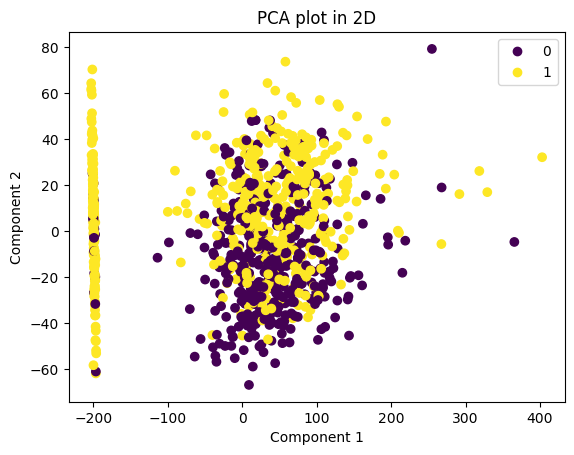

In [69]:
X_PCA = PCA(n_components=5).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

Se visualiza cómo se distribuyen los datos en el gráfico de dispersión en 2D, los puntos en función de sus etiquetas de clase. Esta visualización puede ayudar a comprender la estructura de tus datos en el espacio de las componentes principales.

# Selección de Caracteristicas #

Importar datos (csv) en dataframe

In [86]:
df = pd.read_csv("hea.csv")
print(df.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0  40      140         289          0       172     0.0          0     
1  49      160         180          0       156     1.0          1     
2  37      130         283          0        98     0.0          0     
3  48      138         214          0       108     1.5          1     
4  54      150         195          0       122     0.0          0     


In [93]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

### Ganancia de información ###

El siguiente codigo calcula el puntaje de ganancia de información (InfoGain) o información mutua (mutual information) entre cada característica en el conjunto de datos X y la variable objetivo y.

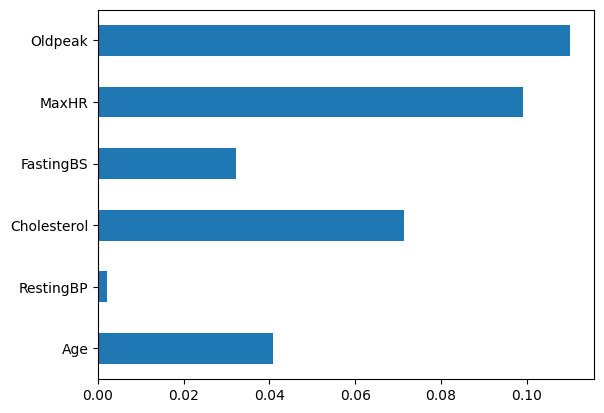

In [94]:
X_new = mutual_info_classif(X, y)
feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

Nos permite visualizar la importancia de las características en un conjunto de datos en relación con una variable objetivo utilizando el puntaje de ganancia de información mutua. El gráfico de barras horizontal permite identificar visualmente las características más relevantes para la tarea de clasificación, ya que tienen puntajes más altos.

### Chi2 ###

El siguiente codigo es una prueba estadística que se utiliza para determinar si existe una asociación significativa entre dos variables categóricas.

In [99]:
X = np.abs(X)
print(X.shape)
chi2_feat = SelectKBest(chi2, k=2)
X_new = chi2_feat.fit_transform(X, y)
print(X_new.shape)

(918, 6)
(918, 2)


Como resultado del código se obtuvo para la reducción de la dimensionalidad de la matriz 'X' de 6 características paso a 2 características relevantes del conjunto de los datos.

### Coeficiente de correlación ###

El codigo genera una identificacion de patrones y relacion entre variables del conjuntos de datos.

<AxesSubplot:>

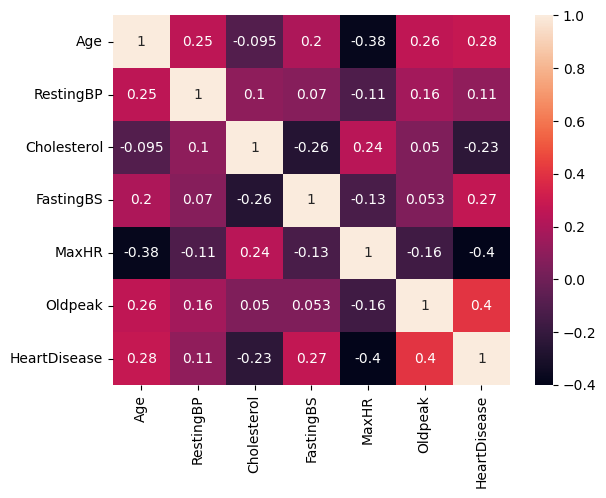

In [100]:
cor = df.corr()
sns.heatmap(cor, annot = True)

Como resultados obtuvimos un mapa de calor que permite visualizar de manera efectiva las relaciones de correlación entre las variables. Siendo un análisis exploratorio que nos permite tomar de decisiones sobre qué variables a considerar en un modelo estadístico o de aprendizaje automático.

### Importancia del bosque aleatorio ###

Siguiente codigo entrena un modelo Random Forest para clasificación, calcula las importancias de las características.

<AxesSubplot:>

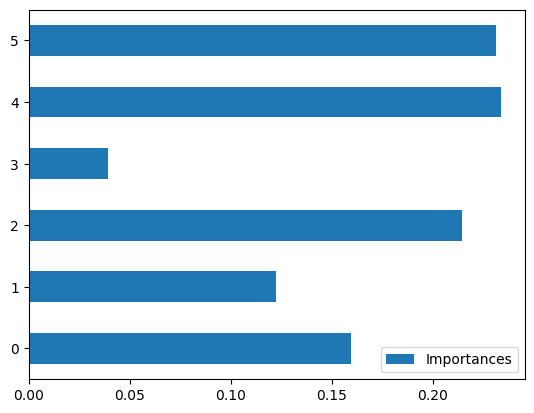

In [219]:
model = RandomForestClassifier(n_estimators=340)
model.fit(X,y)
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
feat_df.set_index('Importances')
feat_df.plot.barh()

Como resultado se puede identificar qué características son las más influyentes en el modelo y pueden ser útiles para la selección de características o para comprender qué factores son más relevantes en el problema de clasificación.

# Conclusión #

En conclusión, estas técnicas y conceptos que hemos explorado son herramientas esenciales en el campo de la ciencia de datos. La limpieza de datos nos permite asegurarnos de que nuestros datos sean confiables y precisos antes de realizar cualquier análisis. Las técnicas de selección de características, como InfoGain, Chi-cuadrado y la importancia del Bosque Aleatorio, nos ayudan a identificar cuáles son las características más relevantes en nuestros conjuntos de datos, lo que puede mejorar significativamente el rendimiento de nuestros modelos de machine learning.

Además, el análisis de correlación y el PCA nos permiten comprender mejor las relaciones y la estructura de los datos, lo que es esencial para la toma de decisiones informadas en proyectos de ciencia de datos. En conjunto, estas herramientas nos ayudan a obtener información valiosa de nuestros datos, a reducir la dimensionalidad cuando es necesario y a construir modelos más precisos y eficientes.

En última instancia, la ciencia de datos es un proceso iterativo que implica la exploración, el análisis y la toma de decisiones basadas en datos. Estas técnicas nos proporcionan las herramientas necesarias para realizar este proceso de manera efectiva y obtener información significativa a partir de los datos.